In [34]:
import pandas as pd
import statsmodels.api as smf
import pylab as pl
import numpy as np
import patsy
import sklearn
%matplotlib inline

# Binary Classification using UCLA admission data

In [4]:
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

Identify the factors/features that influence admission into the graduate school.

In [6]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [41]:
y,x=df.shape
print "There are {0} columns and {1} observations".format(x,y)

There are 4 columns and 400 observations


Create a training and test set using numpy and pandas.

In [59]:
msk = np.random.rand(len(df)) < 0.8
df_train=df[msk]
df_test=df[~msk]
print "Training set has {0} observations and Test set has {1} observations.".format(len(df_train),len(df_test))

Training set has 325 observations and Test set has 75 observations.


In [55]:
df_train.columns = ["admit", "gre", "gpa", "prestige"]
df_test.columns = ["admit", "gre", "gpa", "prestige"]

In [56]:
df_train.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
6,1,560,2.98,1


In [57]:
print df_train.describe()

            admit         gre         gpa    prestige
count  321.000000  321.000000  321.000000  321.000000
mean     0.308411  588.535826    3.394766    2.436137
std      0.462558  115.057212    0.386175    0.953515
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.120000    2.000000
50%      0.000000  600.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000


In [61]:
print df_train.std()

admit         0.469527
gre         117.762199
gpa           0.379809
prestige      0.944490
dtype: float64


Frequency table cutting prestige and whether or not someone was admitted. It appears that students are penalized if they come from less prestigious schools

In [62]:
print pd.crosstab(df_train['admit'], df_train['prestige'], rownames=['admit'])

prestige   1   2   3   4
admit                   
0         26  74  75  44
1         25  48  24   9


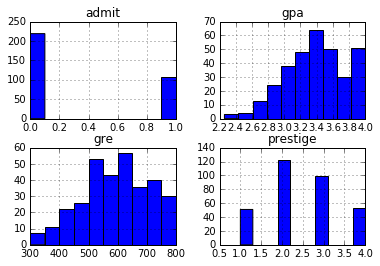

In [63]:
df_train.hist()
pl.show()

Let's look at the correlation of these features with admission.

In [226]:
df[['admit','gre','gpa']].corr()

,admit,gre,gpa
admit,1.000000,0.184434,0.178212
gre,0.184434,1.000000,0.384266
gpa,0.178212,0.384266,1.000000


We can safely assume that GRE and GPA are not correlated with one another to cause problems.

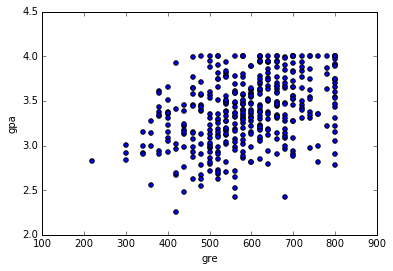

In [233]:
df.plot(kind='scatter',x='gre',y='gpa')

Spearman's Correlation is much more appropriate to use when you are working with ordinal data(prestige). 

In [234]:
df[['admit','prestige','gre','gpa']].corr(method='spearman')

,admit,prestige,gre,gpa
admit,1.000000,-0.243474,0.176630,0.191269
prestige,-0.243474,1.000000,-0.120950,-0.049243
gre,0.176630,-0.120950,1.000000,0.382459
gpa,0.191269,-0.049243,0.382459,1.000000


In [64]:
formula='admit ~ gpa + gre + C(prestige)'
y,X = patsy.dmatrices(formula, df_train, return_type='dataframe')

In [68]:
logit = smf.Logit(y,X).fit()
print logit.params

Optimization terminated successfully.
         Current function value: 0.585368
         Iterations 6
Intercept          -3.792664
C(prestige)[T.2]   -0.353171
C(prestige)[T.3]   -1.116750
C(prestige)[T.4]   -1.448278
gpa                 0.746272
gre                 0.001986
dtype: float64


In [69]:
print logit.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  325
Model:                          Logit   Df Residuals:                      319
Method:                           MLE   Df Model:                            5
Date:                Wed, 20 Apr 2016   Pseudo R-squ.:                 0.07294
Time:                        13:21:36   Log-Likelihood:                -190.24
converged:                       True   LL-Null:                       -205.21
                                        LLR p-value:                 1.519e-05
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -3.7927      1.224     -3.097      0.002        -6.193    -1.393
C(prestige)[T.2]    -0.3532      0.344     -1.027      0.305        -1.027     0.321
C(prestige)[T.3]    -1.1167 

In [70]:
print np.exp(logit.params)

Intercept           0.022535
C(prestige)[T.2]    0.702457
C(prestige)[T.3]    0.327342
C(prestige)[T.4]    0.234975
gpa                 2.109124
gre                 1.001988
dtype: float64


In [75]:
formula='admit ~ gpa + gre + C(prestige)'
y_test,X_test = patsy.dmatrices(formula, df_test, return_type='dataframe')

In [76]:
logit_predicts=logit.predict(X_test)

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()

In [89]:
logit_predicts.round()

array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.])

In [90]:
gaussian_model=gnb.fit(X, y).predict(X_test)

/opt/ds/local/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
accuracy_score(y_test, logit_predicts.round())

0.81333333333333335

In [93]:
accuracy_score(y_test,gaussian_model)

0.66666666666666663

In [109]:
exclude_cols = ['admit']
df_naive=df_train.filter(regex="^(?!({0})$).*$".format('|'.join(exclude_cols)))
df_naive_test=df_test.filter(regex="^(?!({0})$).*$".format('|'.join(exclude_cols)))
df_naive.head()

,gre,gpa,prestige
0,380,3.61,3
1,660,3.67,3
3,640,3.19,4
4,520,2.93,4
5,760,3.00,2


In [110]:
gaussian_model=gnb.fit(df_naive, df_train['admit']).predict(df_naive_test)

In [111]:
accuracy_score(df_test['admit'],gaussian_model)

0.78666666666666663

In [199]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df_naive)
df_std = std_scale.transform(df_naive)
std_scale_test = preprocessing.StandardScaler().fit(df_naive_test)
df_std_test = std_scale_test.transform(df_naive_test)

minmax_scale = preprocessing.MinMaxScaler().fit(df_naive)
df_minmax = minmax_scale.transform(df_naive)
minmax_scale_test = preprocessing.MinMaxScaler().fit(df_naive_test)
df_minmax_test = minmax_scale_test.transform(df_naive_test)

In [200]:
df_scaled_naive=pd.DataFrame(df_std)
df_scaled_naive.columns=['gre','gpa','prestige']
#df_scaled_naive['prestige']=df_naive['prestige'].tolist()

In [201]:
print df_naive.groupby('prestige').size()
print df_scaled_naive.shape

prestige
1     51
2    122
3     99
4     53
dtype: int64
(325, 3)


In [202]:
df_scaled_naive.head(3)

,gre,gpa,prestige
0,-1.790453,0.606095,0.557936
1,0.590886,0.764312,0.557936
2,0.420791,-0.501428,1.618342


In [203]:
gaussian_model=gnb.fit(df_scaled_naive, df_train['admit']).predict(df_std_test)

In [206]:
accuracy_score(df_test['admit'],gaussian_model)

0.80000000000000004

In [205]:
df_scaled_test=pd.DataFrame(df_std_test)
df_scaled_test.columns=['gre','gpa','prestige']
#df_scaled_test['prestige']=df_test['prestige'].tolist()

In [195]:
df_scaled_test.head()

,gre,gpa,prestige
0,2.150957,1.490657,1
1,1.192989,-0.924354,2
2,-0.339759,0.991904,1
3,0.235021,-1.606857,4
4,1.767770,-0.215601,2


In [207]:
df_minmax_train=pd.DataFrame(df_minmax)
df_minmax_train.columns=['gre','gpa','prestige']

In [210]:
df_minmax_train.head()

,gre,gpa,prestige
0,0.16,0.775862,0.666667
1,0.72,0.810345,0.666667
2,0.68,0.534483,1.000000
3,0.44,0.385057,1.000000
4,0.92,0.425287,0.333333


In [211]:
gaussian_model=gnb.fit(df_minmax_train, df_train['admit']).predict(df_minmax_test)

In [215]:
round(accuracy_score(df_test['admit'],gaussian_model),2)

0.79

In [218]:
import numpy as np
np.corrcoef(X['gpa'],X['gre'])

array([[ 1.        ,  0.40160294],
       [ 0.40160294,  1.        ]])

In [223]:
X[['gpa','gre']].corr()

,gpa,gre
gpa,1.000000,0.401603
gre,0.401603,1.000000
